## 3rd Party Embeddings

In [ ]:
# Using 3rd party embeddings as features to the model

In [16]:
%matplotlib inline

import Utils as model_helpers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

Computing Features

In [3]:
half_enantiomer_data = pd.read_csv("half_enantiomer_data.csv")

In [4]:
# Loads in embeddings from 3rd party model to use as features
gme = np.load('enantiomer-embeddings-for-rick.npz', allow_pickle=True) # Load the file
gme = gme['embeddings'].item() # Extract the data
gme = {k: v.squeeze() for k, v in gme.items()} # Flatten the arrays
gme_df = pd.DataFrame(gme).T  # Turn into a dataframe

In [5]:
gme_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
CC1(C)[C@H]2CC[C@H](CO)[C@@H]1C2,3.361583,0.382813,0.000000,0.000000,2.153011,1.410133,2.376704,0.0,0.765796,0.000000,...,0.000000,0.331122,0.251479,0.697581,0.569553,0.785193,0.000000,3.134834,3.344208,0.000000
CCCC[C@H](C(C)C)[C@H](O)CC,1.591573,0.000000,0.428940,1.412535,0.304237,4.056973,2.067844,0.0,0.000000,0.145670,...,0.000000,0.000000,0.000000,0.664556,1.274769,0.000000,0.200347,2.116929,0.000000,0.557281
CCCCCCCC[C@@H](C)O,0.222926,0.000000,0.223172,0.000000,0.000000,5.710248,2.740240,0.0,1.230071,0.000000,...,0.801922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.291554,0.525811,2.257053
CC1(C)[C@H]2CC[C@](C)(C2)[C@H]1O,2.282184,0.912073,0.000000,0.000000,2.890187,0.176412,2.256818,0.0,0.569661,0.000000,...,0.101928,0.000000,0.340307,1.982442,0.941730,0.164528,0.000000,3.065782,2.076539,0.000000
C=C1CC[C@@H](C)C(C)(C)[C@@H]1/C=C/C(C)=O,3.561810,0.000000,0.271860,3.111673,0.000000,0.742194,2.071393,0.0,0.000000,0.158586,...,0.771586,0.000000,0.000000,0.382187,0.000000,1.091824,1.321833,0.000000,0.289515,0.716665


In [6]:
# Make copy of original data and set the index to match that of the gme model
half_enantiomer_data_copy = half_enantiomer_data
half_enantiomer_data_copy = half_enantiomer_data_copy.set_index("SMILES String")

In [7]:
# Keep the columns in the gme df that match the index names in original dataset
common_index = half_enantiomer_data_copy.index.intersection(gme_df.index)
half_enantiomer_data_copy = half_enantiomer_data_copy.loc[common_index]
gme_df = gme_df.loc[common_index]

In [8]:
# Combine original dataset with gme df
g_model_embeddings = half_enantiomer_data_copy.join(gme_df, how="inner")

In [9]:
# Reset the index to be "Moecule Name"
g_model_embeddings = g_model_embeddings.set_index("Molecule Name")

In [10]:
g_model_embeddings.head()

,Unnamed: 0,Unnamed: 0.1,Pubchem ID #,Note,Other SMILES,Method,Contributor,Detection Threshold,Detection Units,Normalized Detection Threshold,...,246,247,248,249,250,251,252,253,254,255
Molecule Name,,,,,,,,,,,,,,,,,,,,,
(R)-(-)- muscone/(R)--3-methyl cyclopentadecanone,20,20,7160826,NaN,NaN,NaN,NaN,6.10E+01,ppb,61.00,...,0.000000,0.000000,0.245207,0.000000,0.000000,0.000000,2.003086,0.000000,2.417500,0.000000
(S)-(+)-2-methylbutanal,42,42,6971249,NaN,NaN,NaN,NaN,1.00E+01,ppm in air,10000.00,...,0.000000,0.866084,1.189604,1.203395,2.965221,0.000000,0.000000,2.632849,0.000000,0.000000
"( 1S,5S)-(-)-\\xce\\xb1-Pinene",64,64,440968,Changed from PubChem ID 6654,CC1=CC[C@H]2C[C@@H]1C2(C)C,Different PubChem ID,DW,1.00E-01,ppb,0.10,...,1.348683,0.000000,0.685428,0.290208,0.000000,0.000000,0.000000,0.955723,3.763213,0.000000
"(1R,3S,4S)-(+)-neomenthol",96,96,439263,NaN,CC(C)[C@@H]1CC[C@@H](C)C[C@@H]1O,ChemDraw + Cactus,DW,8.10E-01,ppb,0.81,...,0.000000,0.000000,0.204114,1.303833,2.614392,0.249996,0.000000,3.942642,1.846398,0.000000
(3S)-(-)-dihydrocitronellol,106,106,92283029,NaN,CC(C)CCC[C@@H](C)CCO,ChemDraw + Cactus,DW,2.50E+02,ppb,250.00,...,1.637907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.083949,1.556027,2.074914


In [19]:
assert ((g_model_embeddings.iloc[:,11:].var() <= 0).sum() == 0), "This should be 0 if not, get rid of columns with 0 varience"

AssertionError: This should be 0 if not, get rid of columns with 0 varience

Model

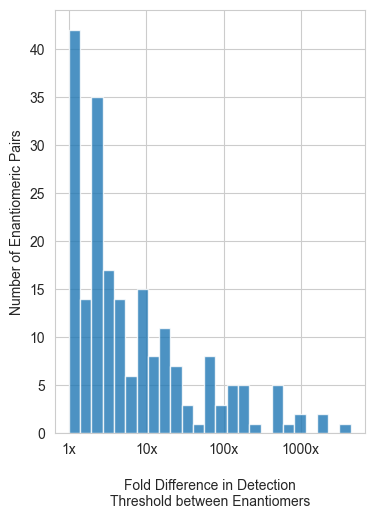

In [15]:
# Illustrate the magnitude differences across enantiomeric pairs in the dataset
model_helpers.fold_difference_of_enantiomers(half_enantiomer_data)

In [17]:
x_gme = g_model_embeddings.iloc[:,11:]
y_gme = g_model_embeddings["log_abs"]
Xn_gme = pd.DataFrame(StandardScaler().fit_transform(x_gme), index=x_gme.index, columns=x_gme.columns)

c:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
c:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error wil

In [18]:
model_helpers.create_model(Xn_gme, y_gme)

  0%|          | 0/13 [00:00<?, ?it/s]c:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
  0%|          | 0/13 [00:00<?, ?it/s]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').